In [1]:
#Choosing training/validation for Y3

#50/50 : start with 150 deg^2, 250 deg^2, 350 deg^2 – converge on limit for size
#*Random selection of parts of 624deg^2 to show invariance or not
#**reserve part of overlap region for science**

import os, sys
import esutil
import healpy as hp
import numpy as np
%matplotlib inline

%load_ext autoreload
%autoreload 2

# call required functions from modules 
sys.path.append('code_py3/')
from cmass_modules import io
from utils import matchCatalogsbyPosition, hpHEALPixelToRaDec, HealPixifyCatalogs, spatialcheck
from xd import mixing_color, XD_fitting_X, assignCMASSProb, doVisualization_1d
from run_DMASS_Y3 import priorCut_test

In /users/PCON0003/warner785/.conda/envs/DES_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /users/PCON0003/warner785/.conda/envs/DES_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /users/PCON0003/warner785/.conda/envs/DES_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
# Calling Y3 GOLD v2.0 (training)
# All catalogs are in the 'input_path' directory 
# The 'SearchAndCallFits' function below loads all 
# catalogs in the directory including 'input_keyword' in its name
#input_path = '/n/des/lee.5922/data/gold_cat_Y3/STRIPE82/feae9705305d4430993687930f1cc3ad/'
input_path = '/fs/scratch/PCON0003/warner785/bwarner/'
# call only first 9 catalogs for a fast run.
# to call all catalogs in the directory, use 'Y3_GOLD' as input_keyword 
# but that will consume huge memory
input_keyword = 'Y3_GOLD_2_0_STRIPE82'  
# Columns to call
columns =  ['RA', 'DEC', 
            'HPIX_4096',     # Healpix in ring order, nside=4096
            'COADD_OBJECT_ID', 
            'SOF_CM_MAG_CORRECTED_G', # mag_[griz]
            'SOF_CM_MAG_CORRECTED_R',
            'SOF_CM_MAG_CORRECTED_I',
            'SOF_CM_MAG_CORRECTED_Z',
            'SOF_CM_MAG_ERR_G',       # mag error_[griz]
            'SOF_CM_MAG_ERR_R',
            'SOF_CM_MAG_ERR_I',
            'SOF_CM_MAG_ERR_Z']
gold_st82 = io.SearchAndCallFits(path = input_path, keyword = input_keyword, columns=columns)

# Color/Magnitude cuts to exclude extremely high or low mag/color sources.
# 16 < mag_riz < 24, 0 < (r-i) < 1.5, 0 < (g-r) < 2.5
# These galaxies are less likeliy to be a CMASS, therefore unnecessary. 
# We apply these cuts to reduce the sample size to speed up the codes
mask_magcut = priorCut_test(gold_st82)
gold_st82 = gold_st82[mask_magcut]


Calling catalogs >>>
Y3_GOLD_2_0_STRIPE82_000125.fits
Y3_GOLD_2_0_STRIPE82_000136.fits
Y3_GOLD_2_0_STRIPE82_000040.fits
Y3_GOLD_2_0_STRIPE82_000015.fits
Y3_GOLD_2_0_STRIPE82_000086.fits
Y3_GOLD_2_0_STRIPE82_000047.fits
Y3_GOLD_2_0_STRIPE82_000108.fits
Y3_GOLD_2_0_STRIPE82_000079.fits
Y3_GOLD_2_0_STRIPE82_000076.fits
Y3_GOLD_2_0_STRIPE82_000057.fits
Y3_GOLD_2_0_STRIPE82_000111.fits
Y3_GOLD_2_0_STRIPE82_000084.fits
Y3_GOLD_2_0_STRIPE82_000088.fits
Y3_GOLD_2_0_STRIPE82_000049.fits
Y3_GOLD_2_0_STRIPE82_000063.fits
Y3_GOLD_2_0_STRIPE82_000070.fits
Y3_GOLD_2_0_STRIPE82_000077.fits
Y3_GOLD_2_0_STRIPE82_000042.fits
Y3_GOLD_2_0_STRIPE82_000118.fits
Y3_GOLD_2_0_STRIPE82_000115.fits
Y3_GOLD_2_0_STRIPE82_000028.fits
Y3_GOLD_2_0_STRIPE82_000140.fits
Y3_GOLD_2_0_STRIPE82_000060.fits
Y3_GOLD_2_0_STRIPE82_000089.fits
Y3_GOLD_2_0_STRIPE82_000143.fits
Y3_GOLD_2_0_STRIPE82_000012.fits
Y3_GOLD_2_0_STRIPE82_000001.fits
Y3_GOLD_2_0_STRIPE82_000045.fits
Y3_GOLD_2_0_STRIPE82_000137.fits
Y3_GOLD_2_0_STRIPE82_

In [6]:
import fitsio
fitsfile = fitsio.read('/fs/scratch/PCON0003/warner785/bwarner/Y3_GOLD_2_0_STRIPE82_000125.fits')
print(fitsfile.dtype.names)

('COADD_OBJECT_ID', 'RA', 'DEC', 'ALPHAWIN_J2000', 'DELTAWIN_J2000', 'PFW_ATTEMPT_ID', 'OBJECT_NUMBER', 'PARENT_NUMBER', 'TILENAME', 'HPIX_4096', 'HPIX_16384', 'L', 'B', 'KRON_RADIUS', 'A_IMAGE', 'B_IMAGE', 'THETA_J2000', 'ERRA_IMAGE', 'ERRB_IMAGE', 'ERRTHETA_IMAGE', 'XWIN_IMAGE', 'YWIN_IMAGE', 'EBV_SFD98', 'EBV_LENZ17', 'EBV_PLANCK13', 'MAG_DETMODEL_G', 'MAG_AUTO_G', 'MAG_APER_8_G', 'WAVG_MAG_PSF_G', 'MAGERR_DETMODEL_G', 'MAGERR_AUTO_G', 'MAGERR_APER_8_G', 'WAVG_MAGERR_PSF_G', 'FLUX_DETMODEL_G', 'FLUX_AUTO_G', 'WAVG_FLUX_PSF_G', 'FLUX_RADIUS_G', 'FLUX_APER_8_G', 'FLUXERR_DETMODEL_G', 'FLUXERR_AUTO_G', 'WAVG_FLUXERR_PSF_G', 'FLUXERR_APER_8_G', 'MU_EFF_MODEL_G', 'MU_MAX_G', 'MU_MAX_MODEL_G', 'MU_MEAN_MODEL_G', 'MU_THRESHOLD_G', 'SPREADERR_MODEL_G', 'SPREAD_MODEL_G', 'CLASS_STAR_G', 'NITER_MODEL_G', 'WAVG_SPREADERR_MODEL_G', 'WAVG_SPREAD_MODEL_G', 'SEXTRACTOR_FLAGS_G', 'IMAFLAGS_ISO_G', 'NEPOCHS_G', 'MOLY_NUMBER_G', 'MAG_DETMODEL_R', 'MAG_AUTO_R', 'MAG_APER_8_R', 'WAVG_MAG_PSF_R', 'MAGER

In [6]:
def keepGoodRegion(des, hpInd = False, balrog=None):
    import healpy as hp
    import fitsio
    # 25 is the faintest object detected by DES
    # objects larger than 25 considered as Noise
    
    path = '/fs/scratch/PCON0003/warner785/bwarner/'
    #LSSGoldmask = fitsio.read(path+'Y1LSSmask_v2_il22_seeil4.0_nside4096ring_redlimcut.fits')
    #LSSGoldmask = fitsio.read(path+'Y1LSSmask_v1_il22seeil4.04096ring_redlimcut.fits')
    LSSGoldmask = fitsio.read(path+'MASK_Y3LSSBAOSOF_22_3_v2p2.fits')
    ringhp = hp.nest2ring(4096, [LSSGoldmask['PIXEL']])
    #Y1LSSmask_v1_il22seeil4.04096ring_redlimcut.fits
    #frac_cut = LSSGoldmask['FRAC'] > 0.8
    #ind_good_ring = LSSGoldmask['PIXEL'][frac_cut]
    ind_good_ring = ringhp
    
    # healpixify the catalog.
    nside=4096
    # Convert silly ra/dec to silly HP angular coordinates.
    phi = des['RA'] * np.pi / 180.0
    theta = ( 90.0 - des['DEC'] ) * np.pi/180.0

    hpInd = hp.ang2pix(nside,theta,phi,nest=False)
    keep = np.in1d(hpInd, ind_good_ring)
    des = des[keep]
    if hpInd is True:
        return ind_good_ring
    else:
        return des

print(gold_st82.size)    
gold_st82 = keepGoodRegion(gold_st82)
print(gold_st82.size)

9547728
7950260


In [7]:
#this CMASS used for Y1, and Y3 now:

import fitsio
cmass = esutil.io.read('/fs/scratch/PCON0003/warner785/bwarner/cmass-dr12v4-S-Reid-full.dat.fits')
train_sample = esutil.io.read('/fs/scratch/PCON0003/warner785/bwarner/cmass-dr12v4-S-Reid-full.dat.fits')
#train_sample = esutil.io.read('/global/cscratch1/sd/bwarner/galaxy_DR11v1_CMASS_South-photoObj.fits.gz')
print('total num of train', train_sample.size)
print('\n--------------------------------\n applying DES veto mask to CMASS\n--------------------------------')   
train_sample = keepGoodRegion(train_sample)

#fitsio.write( output_dir+'/cmass_in_st82.fits', train_sample)

print('num of train_sample after des veto', train_sample.size)

total num of train 258884

--------------------------------
 applying DES veto mask to CMASS
--------------------------------
num of train_sample after des veto 61031


In [8]:
#Running pickle

import pickle

# Su's pickle file: changing from 'b'
outdir = '../output/test/fitting/'
dmass_pickle = outdir+'gauss_cmass_testy3_v4.pkl'  # cmass
dmass_no_pickle = outdir+'gauss_no_testy3_v4.pkl' # noncmass
#clf_cmass_su = XD_fitting_X( None, None, pickleFileName = cmass_su_pickle)

f = open(dmass_pickle, 'rb')
g = open(dmass_no_pickle, 'rb')

clf_dmass = pickle.load(f, encoding="latin1")
clf_dmass = clf_dmass['retval']
clf_nodmass = pickle.load(g, encoding="latin1")
clf_nodmass = clf_nodmass['retval']
X_sample_dmass = clf_dmass.sample(200000)        # non-cmass model
X_sample_nodmass = clf_nodmass.sample(200000)
print(clf_dmass)
print(clf_nodmass)

In [9]:
# FIGURE 3

#clf_cmass = XD_fitting_X( None, None, pickleFileName = '../output/test/fitting/gauss_cmass_testy3.pkl')               
#clf_no = XD_fitting_X( None, None, pickleFileName = '../output/test/fitting/gauss_no_testy3.pkl')

#call in catalogs
# Assigning CMASS probabilities to Gold Y3 in Stripe 82 Training/Testing Region.
mag = ['SOF_CM_MAG_CORRECTED', 'SOF_CM_MAG_CORRECTED' ]
err = ['SOF_CM_MAG_ERR', 'SOF_CM_MAG_ERR']
filter = ['G', 'R', 'I']

mask = (gold_st82['RA']>330) & (gold_st82['RA']<360)
mask = mask & (gold_st82['DEC']>-5) & (gold_st82['DEC']<5)
gold_st82_train = gold_st82[mask]

mask_cmass = (train_sample['RA']<330) & (train_sample['RA']<360)
mask_cmass = mask_cmass & (train_sample['DEC']>-5) & (train_sample['DEC']<5)
cmass_train1 = train_sample[mask_cmass]
mg1, mg2, _ = esutil.htm.HTM(10).match(train_sample['RA'], train_sample['DEC'], gold_st82_train['RA'], \
                                         gold_st82_train['DEC'],2./3600, maxmatch=1)
cmass_mask_train = np.zeros(gold_st82_train.size, dtype=bool)
cmass_mask_train[mg2] = 1
clean_cmass_data_des_train, nocmass_train = gold_st82_train[cmass_mask_train], gold_st82_train[~cmass_mask_train]

clean_cmass_data_des = clean_cmass_data_des_train

cmass_fraction = clean_cmass_data_des.size*1./gold_st82_train.size

# Validation regions for DES:
mask1 = (gold_st82['RA']<30)
mask1 = mask1 & (gold_st82['DEC']>-10) & (gold_st82['DEC']<10)
gold_st82_v1 = gold_st82[mask1]

mask2 =(gold_st82['RA']>15)&(gold_st82['RA']<41)
mask2 = mask2 & (gold_st82['DEC']>-10) & (gold_st82['DEC']<10)
gold_st82_v2 = gold_st82[mask2]

mask3 =(gold_st82['RA']>24)&(gold_st82['RA']<45)|((gold_st82['RA']<330)&(gold_st82['RA']>300))
mask3 = mask3 & (gold_st82['DEC']>-10) & (gold_st82['DEC']<10)
gold_st82_v3 = gold_st82[mask3]

# Validation regions for CMASS:
mask1_cmass = (train_sample['RA']<30)
mask1_cmass = mask1_cmass & (train_sample['DEC']>-10) & (train_sample['DEC']<10)
cmass_v1 = train_sample[mask1_cmass]
mg1, mg2, _ = esutil.htm.HTM(10).match(train_sample['RA'], train_sample['DEC'], gold_st82_v1['RA'], \
                                         gold_st82_v1['DEC'],2./3600, maxmatch=1)
cmass_mask1 = np.zeros(gold_st82_v1.size, dtype=bool)
cmass_mask1[mg2] = 1
clean_cmass_data_des_v1, nocmass_v1 = gold_st82_v1[cmass_mask1], gold_st82_v1[~cmass_mask1]

mask2_cmass = (train_sample['RA']>15) & (train_sample['DEC']<41)
mask2_cmass = mask2_cmass & (train_sample['DEC']>-10) & (train_sample['DEC']<10)
cmass_v2 = train_sample[mask2_cmass]
mg1, mg2, _ = esutil.htm.HTM(10).match(train_sample['RA'], train_sample['DEC'], gold_st82_v2['RA'], \
                                         gold_st82_v2['DEC'],2./3600, maxmatch=1)
cmass_mask2 = np.zeros(gold_st82_v2.size, dtype=bool)
cmass_mask2[mg2] = 1
clean_cmass_data_des_v2, nocmass_v2 = gold_st82_v2[cmass_mask2], gold_st82_v2[~cmass_mask2]

mask3_cmass = (train_sample['RA']>24) & (train_sample['DEC']<45)|((train_sample['RA']<330)&(train_sample['RA']>300))
mask3_cmass = mask3_cmass & (train_sample['DEC']>-10) & (train_sample['DEC']<10)
cmass_v3 = train_sample[mask3_cmass]
mg1, mg2, _ = esutil.htm.HTM(10).match(train_sample['RA'], train_sample['DEC'], gold_st82_v3['RA'], \
                                         gold_st82_v3['DEC'],2./3600, maxmatch=1)
cmass_mask3 = np.zeros(gold_st82_v3.size, dtype=bool)
cmass_mask3[mg2] = 1
clean_cmass_data_des_v3, nocmass_v3 = gold_st82_v3[cmass_mask3], gold_st82_v3[~cmass_mask3]


# now:
cmass_train = clean_cmass_data_des_train
#cmass_val1 = clean_cmass_data_des[~mask_half]

In [10]:
print(clean_cmass_data_des_v2)

[(292283688, 16.220295,  2.901061, 73899987, 0.02107717, 0.00881002, 0.00832661, 0.00867515, 21.42752124, 19.51023928, 18.65825605, 18.24334944)
 (284396737, 15.258332,  1.159703, 73848122, 0.01544273, 0.01047436, 0.0099151 , 0.01024167, 21.28898402, 20.13170388, 19.43799519, 19.06070133)
 ( 91231120, 33.709479,  0.416435, 73139088, 0.0156236 , 0.00779215, 0.0074231 , 0.00878073, 21.56598879, 19.89500852, 19.26530068, 18.93333084)
 ...
 (242440396, 25.4683  ,  4.171357, 74528404, 0.01167807, 0.00433324, 0.00407995, 0.00433216, 20.53014678, 18.54523709, 17.78741091, 17.38917092)
 ( 62957547, 30.272647, -1.742972, 72949776, 0.02580297, 0.00832144, 0.00747062, 0.00876877, 21.35918256, 19.71612228, 18.99082859, 18.6381733 )
 (242444113, 25.152851,  4.096448, 74529048, 0.01765944, 0.00912827, 0.00807665, 0.00904651, 21.62130182, 20.38721484, 19.62234755, 19.23683345)]


In [17]:
#takes 20 percent of validation samples:
print(gold_st82_v1.size)
gold_v1_random_ind = np.random.choice(np.arange(gold_st82_v1.size), size = int(gold_st82_v1.size/5))
gold_v1_random = gold_st82_v1[gold_v1_random_ind]
print(gold_v1_random.size)

print(gold_st82_v2.size)
gold_v2_random_ind = np.random.choice(np.arange(gold_st82_v2.size), size = int(gold_st82_v2.size/5))
gold_v2_random = gold_st82_v2[gold_v2_random_ind]
print(gold_v2_random.size)

print(gold_st82_v3.size)
gold_v3_random_ind = np.random.choice(np.arange(gold_st82_v3.size), size = int(gold_st82_v3.size/5))
gold_v3_random = gold_st82_v3[gold_v3_random_ind]
print(gold_v3_random.size)

#match CMASS to random
mg1, mg2, _ = esutil.htm.HTM(10).match(train_sample['RA'], train_sample['DEC'], gold_v1_random['RA'], \
                                         gold_v1_random['DEC'],2./3600, maxmatch=1)
cmass_mask1 = np.zeros(gold_v1_random.size, dtype=bool)
cmass_mask1[mg2] = 1
clean_cmass_data_des_v1, nocmass_v1 = gold_v1_random[cmass_mask1], gold_v1_random[~cmass_mask1]

mg1, mg2, _ = esutil.htm.HTM(10).match(train_sample['RA'], train_sample['DEC'], gold_v2_random['RA'], \
                                         gold_v2_random['DEC'],2./3600, maxmatch=1)
cmass_mask2 = np.zeros(gold_v2_random.size, dtype=bool)
cmass_mask2[mg2] = 1
clean_cmass_data_des_v2, nocmass_v2 = gold_v2_random[cmass_mask2], gold_v2_random[~cmass_mask2]

mg1, mg2, _ = esutil.htm.HTM(10).match(train_sample['RA'], train_sample['DEC'], gold_v3_random['RA'], \
                                         gold_v3_random['DEC'],2./3600, maxmatch=1)
cmass_mask1 = np.zeros(gold_v3_random.size, dtype=bool)
cmass_mask1[mg2] = 1
clean_cmass_data_des_v3, nocmass_v3 = gold_v3_random[cmass_mask1], gold_v3_random[~cmass_mask1]

3508697
701739
3534397
706879
3889950
777990


In [18]:
print(clean_cmass_data_des_v2)

[(268492410, 25.667653, -7.245547, 71805168, 0.05138704, 0.02176097, 0.01726202, 0.0225686 , 21.97734407, 20.55312318, 19.7269224 , 19.40774719)
 (121252507, 37.056309, -3.275314, 72474268, 0.02078671, 0.01378405, 0.01357634, 0.01592694, 21.36766682, 20.14519952, 19.58860814, 19.21425669)
 ( 91153072, 33.738681,  1.240679, 73150478, 0.02804062, 0.01048107, 0.01008789, 0.01115188, 21.97499181, 20.0652554 , 19.26894249, 18.87887193)
 ...
 (297554892, 18.119583, -5.272677, 72255990, 0.04335632, 0.01554101, 0.01430751, 0.01600707, 21.86400293, 19.95371293, 19.16251223, 18.77517184)
 (253828846, 26.882203, -9.173341, 71725561, 0.05338788, 0.01410779, 0.01217008, 0.01207613, 22.70497717, 20.69570255, 19.63795721, 19.15498055)
 (216682438, 20.987534,  1.377433, 74481849, 0.03328931, 0.01247993, 0.01162969, 0.01336049, 21.91414584, 20.22764511, 19.50633775, 19.14968351)]


1398386
279677
calculate loglikelihood gaussian with multiprocessing module
multiprocessing 100 % 
calculate loglikelihood gaussian with multiprocessing module
multiprocessing 100 % 


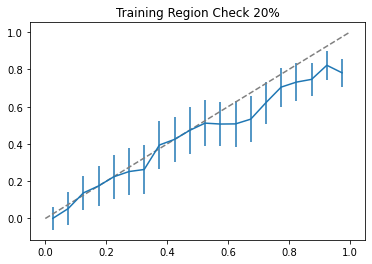

In [12]:
#training region check

mask = (gold_st82['RA']>330) & (gold_st82['RA']<360)
mask = mask & (gold_st82['DEC']>-5) & (gold_st82['DEC']<5)
gold_st82_train = gold_st82[mask]

mask_cmass = (train_sample['RA']<330) & (train_sample['RA']<360)
mask_cmass = mask_cmass & (train_sample['DEC']>-5) & (train_sample['DEC']<5)
cmass_train1 = train_sample[mask_cmass]

print(gold_st82_train.size)
gold_train_random_ind = np.random.choice(np.arange(gold_st82_train.size), size = int(gold_st82_train.size/5))
gold_train_random = gold_st82_train[gold_train_random_ind]
print(gold_train_random.size)

mg1, mg2, _ = esutil.htm.HTM(10).match(train_sample['RA'], train_sample['DEC'], gold_train_random['RA'], \
                                         gold_train_random['DEC'],2./3600, maxmatch=1)
cmass_mask_train = np.zeros(gold_train_random.size, dtype=bool)
cmass_mask_train[mg2] = 1
clean_cmass_data_des_train, nocmass_train = gold_train_random[cmass_mask_train], gold_train_random[~cmass_mask_train]

clean_cmass_data_des = clean_cmass_data_des_train

clean_dmass_prob_train = assignCMASSProb(clean_cmass_data_des, clf_dmass, clf_nodmass, 
                     cmass_fraction =0.007604481166144398
, 
                     mag=mag, err=err, filter=filter )


dmass_st82_real_train = clean_dmass_prob_train # actual CMASS galaxies in train set
dmass_st82_val_train = assignCMASSProb(gold_train_random, clf_dmass, clf_nodmass, 
                     cmass_fraction = 0.007604481166144398
, 
                     mag=mag, err=err, filter=filter )

pbin = np.linspace(0, 1, 21)
pcenter = pbin[:-1] + 0.025
N, _ = np.histogram(dmass_st82_real_train['CMASS_PROB'], bins=pbin)

import matplotlib.pyplot as plt
#pbin, frac, fracerr = np.genfromtxt('../paper_figure/model_probability.txt', unpack=True)

M, _ = np.histogram(dmass_st82_val_train['CMASS_PROB'], bins=pbin)

frac = N/M
fracerr = 1/np.sqrt(N) #1 / sqrt(number of true cmass galaxies in each bin)

fig, ax = plt.subplots()
ax.errorbar( pcenter, frac, yerr=fracerr)
ax.plot([0,1], [0,1], ls='--', color='grey')
plt.title('Training Region Check 20%')
fig.savefig('test_histo_train.pdf')

cmass fraction:  0.007604481166144398
calculate loglikelihood gaussian with multiprocessing module
multiprocessing 100 % 
calculate loglikelihood gaussian with multiprocessing module
multiprocessing 100 % 
pcenter 20
pbin = [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
frac =  [0.00107417 0.06604096 0.12774725 0.16564417 0.22139037 0.29668675
 0.33643123 0.39789474 0.40449438 0.43669251 0.49456522 0.5184136
 0.55319149 0.57333333 0.63       0.68370607 0.61206897 0.68686869
 0.77005348 0.74681239]
frac.size 20
frac err 20
[0.03686049 0.05083286 0.05986843 0.06804138 0.0695048  0.07124705
 0.07432941 0.0727393  0.0745356  0.07692308 0.07412493 0.07392213
 0.08006408 0.07624929 0.0727393  0.06835859 0.06851887 0.06063391
 0.04811252 0.04938648]


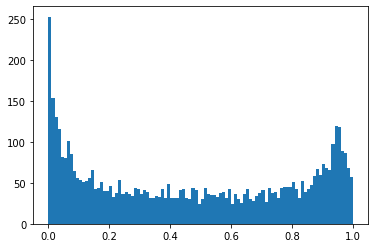

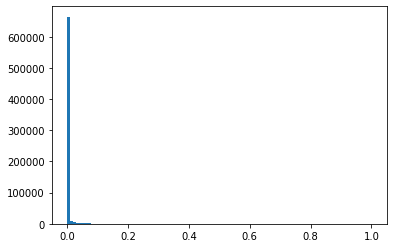

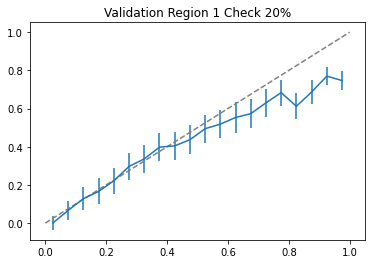

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

print('cmass fraction: ', cmass_fraction)
#(Validation 1) Figure 3
clean_dmass_prob1 = assignCMASSProb(clean_cmass_data_des_v1, clf_dmass, clf_nodmass, 
                     cmass_fraction =0.007604481166144398
, 
                     mag=mag, err=err, filter=filter )
#dmass_st82 = io.SearchAndCallFits(path = rootdir, keyword='gold_st82_prob.fits')
#this is simply gold_st82 with all cuts made
#XD of y1 gold des in st82 -- with membership probability
dmass_st82_real1 = clean_dmass_prob1 # actual CMASS galaxies in val set

# all calculated DMASS for validation sets:

#for-loop? larger data set
dmass_st82_val1 = assignCMASSProb(gold_v1_random, clf_dmass, clf_nodmass, 
                     cmass_fraction = 0.007604481166144398
, 
                     mag=mag, err=err, filter=filter )

pbin = np.linspace(0, 1, 21)
pcenter = pbin[:-1] + 0.025
print('pcenter',pcenter.size)
N, _ = np.histogram(dmass_st82_real1['CMASS_PROB'], bins=pbin) # -- true cmass
print('pbin =', pbin)
M, _ = np.histogram(dmass_st82_val1['CMASS_PROB'], bins=pbin) # -- dmass

fig, ax = plt.subplots()
ax.hist( dmass_st82_real1['CMASS_PROB'], bins= 100)
fig, ax = plt.subplots()
ax.hist( dmass_st82_val1['CMASS_PROB'], bins= 100)

#pbin, frac, fracerr = np.genfromtxt('../paper_figure/model_probability.txt', unpack=True)

frac = N/M
print('frac = ', frac)
print('frac.size', frac.size)
fracerr = 1/np.sqrt(N) #1 / sqrt(number of true cmass galaxies in each bin)
print('frac err', fracerr.size)
fig, ax = plt.subplots()
ax.errorbar( pcenter, frac, yerr=fracerr)
plt.title('Validation Region 1 Check 20%')
print(fracerr)
ax.plot([0,1], [0,1], ls='--', color='grey')

fig.savefig('test_histo.pdf')

calculate loglikelihood gaussian with multiprocessing module
multiprocessing 100 % 
calculate loglikelihood gaussian with multiprocessing module
multiprocessing 100 % 
pbin = [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
frac =  [0.00106464 0.07046632 0.12409812 0.1728763  0.24767442 0.27338129
 0.30821918 0.35964912 0.40364583 0.43116883 0.46290801 0.52352941
 0.53525641 0.5504886  0.62037037 0.66451613 0.70136986 0.70786517
 0.7766323  0.74384236]


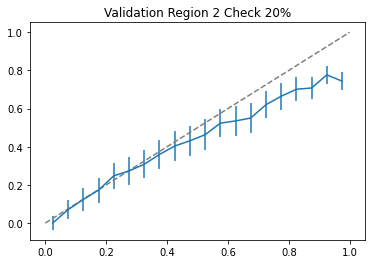

In [19]:
#(Validation 2) Figure 3

clean_dmass_prob2 = assignCMASSProb(clean_cmass_data_des_v2, clf_dmass, clf_nodmass, 
                     cmass_fraction =0.007604481166144398
, 
                     mag=mag, err=err, filter=filter ) 
dmass_st82_real2 = clean_dmass_prob2

dmass_st82_val2 = assignCMASSProb(gold_v2_random, clf_dmass, clf_nodmass, 
                     cmass_fraction = 0.007604481166144398
, 
                     mag=mag, err=err, filter=filter )


pbin = np.linspace(0, 1, 21)
pcenter = pbin[:-1] + 0.025
N, _ = np.histogram(dmass_st82_real2['CMASS_PROB'], bins=pbin)
print('pbin =', pbin)
import matplotlib.pyplot as plt
#pbin, frac, fracerr = np.genfromtxt('../paper_figure/model_probability.txt', unpack=True)

M, _ = np.histogram(dmass_st82_val2['CMASS_PROB'], bins=pbin)

frac = N/M
print('frac = ', frac)
fracerr = 1/np.sqrt(N) #1 / sqrt(number of true cmass galaxies in each bin)

fig, ax = plt.subplots()
ax.errorbar( pcenter, frac, yerr=fracerr)
ax.plot([0,1], [0,1], ls='--', color='grey')
plt.title('Validation Region 2 Check 20%')
fig.savefig('test_histo2.pdf')

#describe plot: ***used for model and validation sample-- what is done to create plot

calculate loglikelihood gaussian with multiprocessing module
multiprocessing 100 % 
calculate loglikelihood gaussian with multiprocessing module
multiprocessing 100 % 
pbin = [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
frac =  [0.00100165 0.05908028 0.11912226 0.1908284  0.20814978 0.26783311
 0.32830189 0.37992126 0.39574468 0.40804598 0.45528455 0.48780488
 0.5234657  0.56462585 0.61258278 0.66778523 0.74242424 0.71670702
 0.76243094 0.7329932 ]


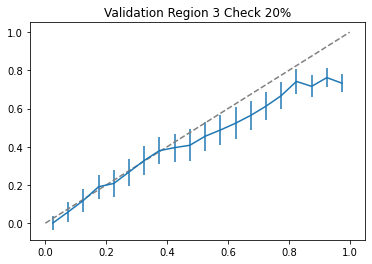

In [15]:
#(Validation 3) Figure 3

clean_dmass_prob3 = assignCMASSProb(clean_cmass_data_des_v3, clf_dmass, clf_nodmass, 
                     cmass_fraction =0.007604481166144398
, 
                     mag=mag, err=err, filter=filter ) 
dmass_st82_real3 = clean_dmass_prob3 

dmass_st82_val3 = assignCMASSProb(gold_v3_random, clf_dmass, clf_nodmass, 
                     cmass_fraction = 0.007604481166144398
, 
                     mag=mag, err=err, filter=filter )

pbin = np.linspace(0, 1, 21)
pcenter = pbin[:-1] + 0.025
N, _ = np.histogram(dmass_st82_real3['CMASS_PROB'], bins=pbin)
print('pbin =', pbin)
import matplotlib.pyplot as plt
#pbin, frac, fracerr = np.genfromtxt('../paper_figure/model_probability.txt', unpack=True)

M, _ = np.histogram(dmass_st82_val3['CMASS_PROB'], bins=pbin)

frac = N/M
print('frac = ', frac)
fracerr = 1/np.sqrt(N) #1 / sqrt(number of true cmass galaxies in each bin)

fig, ax = plt.subplots()
ax.errorbar( pcenter, frac, yerr=fracerr)
ax.plot([0,1], [0,1], ls='--', color='grey')
plt.title('Validation Region 3 Check 20%')

fig.savefig('test_histo3.pdf')

In [20]:
# save the samples. 
outdir = '../output/test/train_cat/y3/'
os.makedirs(outdir, exist_ok=True)
esutil.io.write( outdir+'dmass_st82_val1.fits', dmass_st82_val1, overwrite=True)
esutil.io.write( outdir+'dmass_st82_val2.fits', dmass_st82_val2, overwrite=True)
esutil.io.write( outdir+'dmass_st82_val3.fits', dmass_st82_val3, overwrite=True)